In [1]:
# Libary Imports
import pandas as pd
import numpy as np
from scipy.stats import norm,t 
import matplotlib.pyplot as plt
import statsmodels.api as sm 

# Local Import
from utility import load_data

In [2]:
# Load Data
df = load_data('DASH_merged.txt')
df.head()

,positive_score_en,negative_score_en,score_en,positive_volume_en,negative_volume_en,volume_ratio_en,total_volume_en,total_volume_non_en,total_volume_global,close,high,low,open,volumefrom,volumeto,logclose,loghigh,loglow,logopen,fluctuation
time,,,,,,,,,,,,,,,,,,,,
2018-01-02 11:00:00,2.040000,1.339500,0.700500,3,1,3.0000,48,3,51,1092.99,1098.78,1089.73,1097.59,973.44,1063595.19,6.996672,7.001956,6.993685,7.000872,-0.004200
2018-01-02 12:00:00,1.750175,1.512967,0.237208,16,3,5.3333,212,30,242,1089.11,1099.60,1085.70,1092.99,465.27,509020.53,6.993116,7.002702,6.989980,6.996672,-0.003556
2018-01-02 13:00:00,1.901171,1.776850,0.124321,38,6,6.3333,226,33,259,1113.63,1115.54,1089.19,1089.28,1576.62,1740882.55,7.015380,7.017094,6.993190,6.993272,0.022108
2018-01-02 14:00:00,2.065209,1.442150,0.623059,32,4,8.0000,255,17,272,1104.40,1117.30,1102.59,1113.25,883.14,980074.94,7.007057,7.018670,7.005417,7.015039,-0.007981
2018-01-02 15:00:00,1.757532,1.685425,0.072107,34,4,8.5000,247,17,264,1100.28,1107.73,1090.27,1104.89,640.29,704188.97,7.003320,7.010068,6.994181,7.007501,-0.004181


Text(0, 0.5, 'Closing Price')

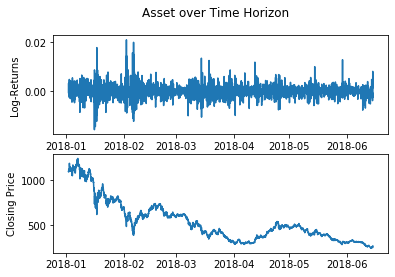

In [3]:
# Log Returns
r = df['logclose'].pct_change().dropna()
# r = r.resample('D').sum()

# Plotting
fig, ax = plt.subplots(2)
fig.suptitle("Asset over Time Horizon")

ax[0].plot(r)
ax[0].set_ylabel('Log-Returns')

ax[1].plot(df['close'])
ax[1].set_ylabel('Closing Price')

In [4]:
# Compute the first four moments
print(f'Number of Observations = {r.count()}')
print(f'Mean = {r.mean():.4f}')
print(f'Std. deviation = {r.std():.4f}')
print(f'Skewness = {r.skew():.4f}')
print(f'Excess kurtosis = {(r.kurt()-3):.4f}')

Number of Observations = 3919
Mean = -0.0001
Std. deviation = 0.0023
Skewness = 0.4964
Excess kurtosis = 6.0706


Fit Normal and Student's t-Distribution to the sample data

In [5]:
# Define point grid between min and max log return
nbins = 150
x = np.linspace(np.min(r),np.max(r),nbins) 

# MLE of Normal Distribuion
mean, std = norm.fit(r)
log_likelihood_norm = norm.logpdf(r,mean,std).sum()

# MLE of Student-t distribution
df, loc, scale  = t.fit(r)
log_likelihood_student = t.logpdf(r, df,loc,scale).sum()

print('Log-likelihood:')
print(f'Normal Distribution = {log_likelihood_norm:.2f}')
print(f'Students t-Distribution = {log_likelihood_student:.2f}')

Log-likelihood:
Normal Distribution = 18180.72
Students t-Distribution = 18727.68


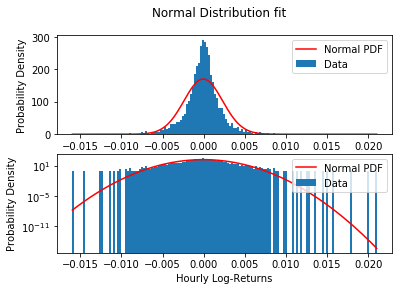

In [6]:
# Plot Empirical PDF vs Normal Distribution 
fig, ax = plt.subplots(2)
fig.suptitle('Normal Distribution fit')

ax[0].hist(r,nbins,density=True,label='Data')
ax[0].plot(x,norm.pdf(x,loc = mean, scale = std),'r',label ='Normal PDF')
ax[0].set_ylabel('Probability Density')
ax[0].set_xlabel('Hourly Log-Returns')
ax[0].legend()

ax[1].hist(r,nbins,density=True,label='Data')
ax[1].plot(x,norm.pdf(x,loc = mean, scale = std),'r',label ='Normal PDF')
ax[1].set_ylabel('Probability Density')
ax[1].set_xlabel('Hourly Log-Returns')
ax[1].set_yscale('log')
ax[1].legend()

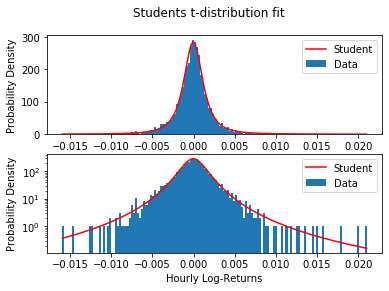

In [7]:
# Plot Empirical PDF vs Student's t-Distribution
fig, ax = plt.subplots(2)
fig.suptitle('Students t-distribution fit')

ax[0].hist(r,nbins,density=True,label='Data')
ax[0].plot(x,t.pdf(x,loc = loc, scale = scale,df=df),'r',label ='Student')
ax[0].set_ylabel('Probability Density')
ax[0].set_xlabel('Hourly Log-Returns')
ax[0].legend()


ax[1].hist(r,nbins,density=True,label='Data')
ax[1].plot(x,t.pdf(x,loc = loc, scale = scale,df=df),'r',label ='Student')
ax[1].set_ylabel('Probability Density')
ax[1].set_xlabel('Hourly Log-Returns')
ax[1].set_yscale('log')
ax[1].legend()

Let's take a look at the tails of the Sample Data

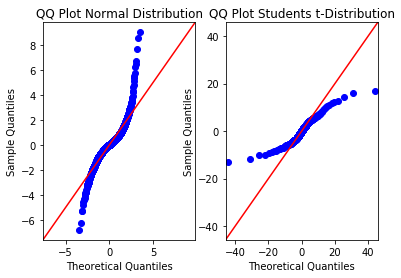

In [8]:
# Plot of empirical CCDF vs Gaussian

fig,ax = plt.subplots(1,2)
sm.qqplot(r, dist='norm',fit=True, line ='45',ax=ax[0]) 
sm.qqplot(r, dist='t',fit=True, line ='45',ax=ax[1])
ax[0].set_title('QQ Plot Normal Distribution')
ax[1].set_title('QQ Plot Students t-Distribution')

plt.show()
